In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [10]:
df.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

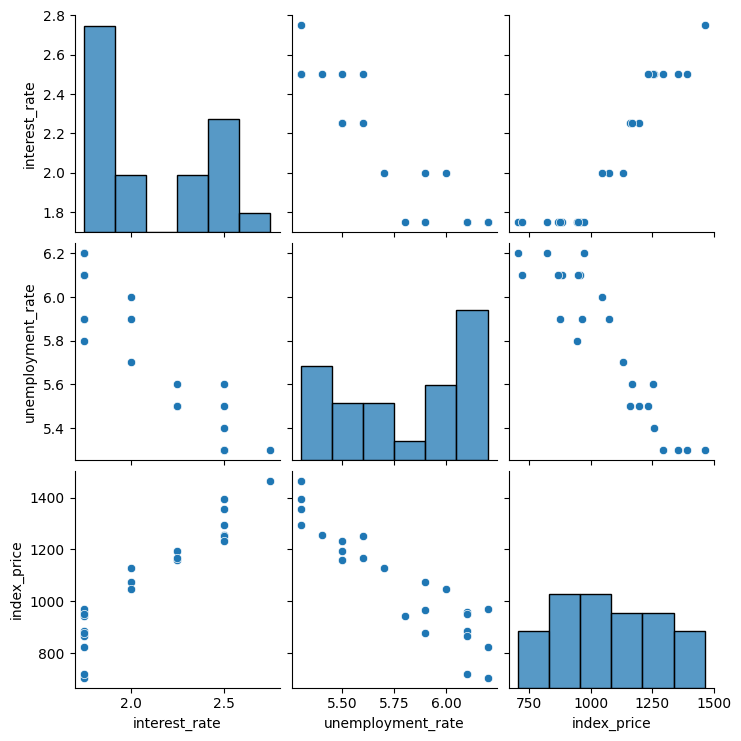

In [13]:
sns.pairplot(df)
plt.show()

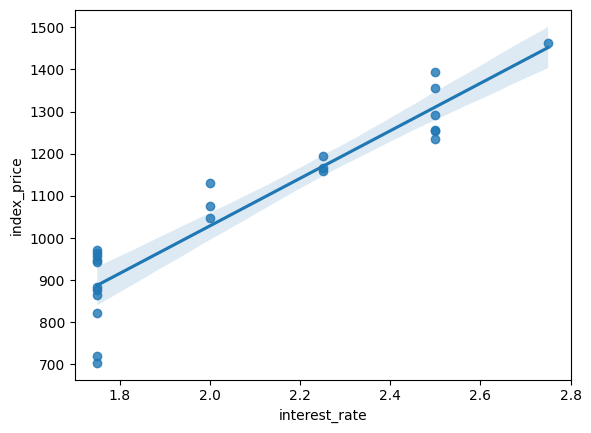

In [20]:
sns.regplot(x="interest_rate", y="index_price", data=df)
plt.show()


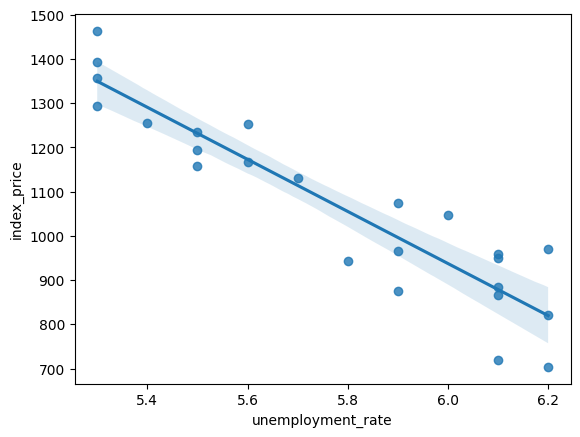

In [21]:
sns.regplot(x="unemployment_rate", y="index_price", data=df)
plt.show()


In [14]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [ ]:
x = df[["interest_rate", "unemployment_rate"]]
y = df["index_price"]
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (18, 2)
x_test.shape: (6, 2)
y_train.shape: (18,)
y_test.shape: (6,)


In [32]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()



X_train_std = std.fit_transform(x_train)
X_test_std = std.fit_transform(x_test)

print(X_train_std)


[[-0.90115511  0.37908503]
 [ 1.31077107 -1.48187786]
 [-0.90115511  1.30956648]
 [ 1.31077107 -0.55139641]
 [ 1.31077107 -1.48187786]
 [-0.16384638  0.68924552]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -1.48187786]
 [ 1.31077107 -1.17171738]
 [-0.90115511  1.30956648]
 [-0.90115511  0.999406  ]
 [-0.90115511  0.37908503]
 [-0.90115511  0.999406  ]
 [ 0.57346234 -0.8615569 ]
 [-0.16384638 -0.24123593]
 [-0.90115511  0.06892455]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -0.8615569 ]]


In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
## Cross Validation
from sklearn.model_selection import cross_val_score

cross = cross_val_score(model, x_train, y_train,scoring="neg_mean_squared_error", cv=3)

print(cross) 

[-4921.61331265 -7686.87497294 -5135.9962549 ]


In [35]:
y_pred = model.predict(x_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [37]:
# Performace metrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print(f"Adjusted R2 Score: {adj_r2}")

MSE: 5793.762887712554
MAE: 59.935781523235505
RMSE: 76.11677139574796
R2 Score: 0.827897809145715
Adjusted R2 Score: 0.7131630152428583


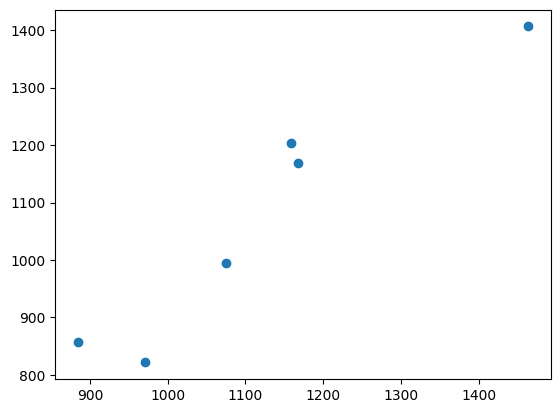

In [38]:
## Assumptions

plt.scatter(y_test, y_pred)

In [39]:
residual = y_test - y_pred
residual 

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

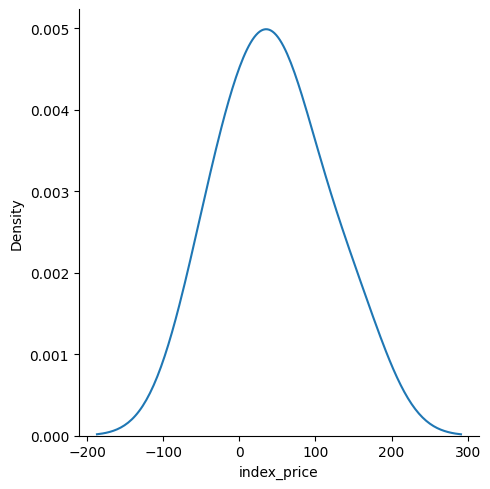

In [41]:
sns.displot(residual,kind='kde')

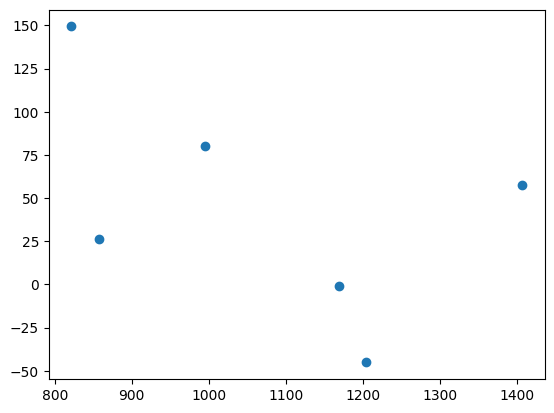

In [42]:
plt.scatter(y_pred,residual)